In [65]:
! pip install --upgrade pandoc

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 
import json

1. Data set reference link: https://www.consumerfinance.gov/data-
research/consumer-complaints/#download-the-data
File data source: https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Problem statement:
Download the data from the file data source and provide possible data insights.

In [5]:
df=pd.read_csv("complaints.csv")
df.head()

C:\Users\kishore\AppData\Local\Temp\ipykernel_6648\864705133.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",MI,48228,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025658
1,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30315,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025656
2,2024-05-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,FL,33139,NaN,NaN,Web,2024-05-04,In progress,Yes,NaN,8924799
3,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30144,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025651
4,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",CT,06040,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025643


In [7]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251126 entries, 0 to 5251125
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 721.

In [8]:
# Check for missing values
print(df.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 3
Sub-issue                        736321
Consumer complaint narrative    3411704
Company public response         2733501
Company                               0
State                             45801
ZIP code                          30225
Tags                            4764840
Consumer consent provided?      1042778
Submitted via                         0
Date sent to company                  0
Company response to consumer         15
Timely response?                      0
Consumer disputed?              4482810
Complaint ID                          0
dtype: int64


In [9]:
# Convert the 'Date received' column to datetime format
df['Date received'] = pd.to_datetime(df['Date received'])

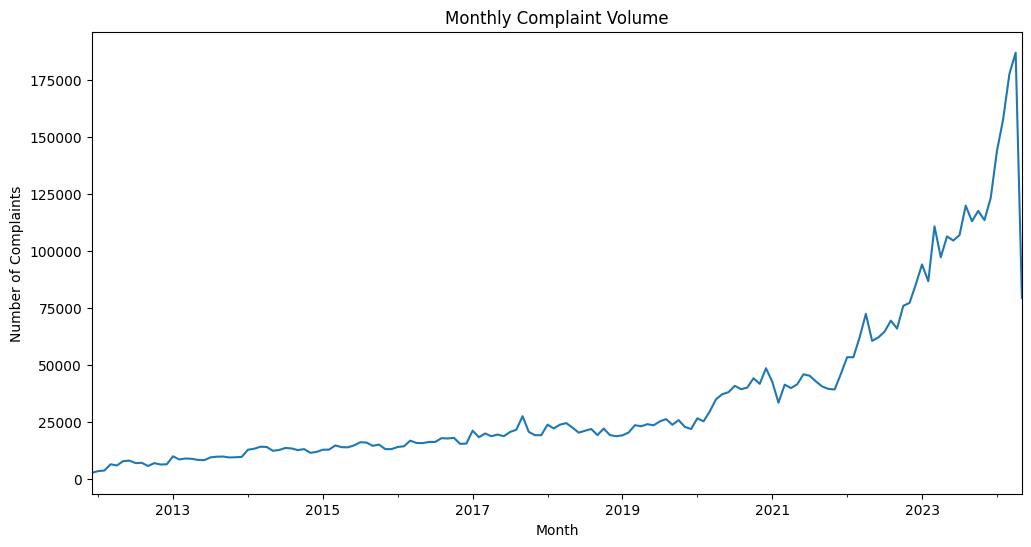

In [40]:
# lets count the complains by month
complaints_by_month = df.groupby(df['Date received'].dt.to_period('M')).size()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
complaints_by_month.plot()
plt.title('Monthly Complaint Volume')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.show()




Distribution of Complaints by Product

In [34]:
# Count complaints by product
product_counts = df['Product'].value_counts()
product_counts

Product
Credit reporting, credit repair services, or other personal consumer reports    2163876
Credit reporting or other personal consumer reports                             1030432
Debt collection                                                                  572058
Mortgage                                                                         398524
Checking or savings account                                                      214238
Credit card or prepaid card                                                      206373
Credit reporting                                                                 140429
Credit card                                                                      135785
Student loan                                                                      88655
Bank account or service                                                           86205
Money transfer, virtual currency, or money service                                68912
Vehicle loan or lease   

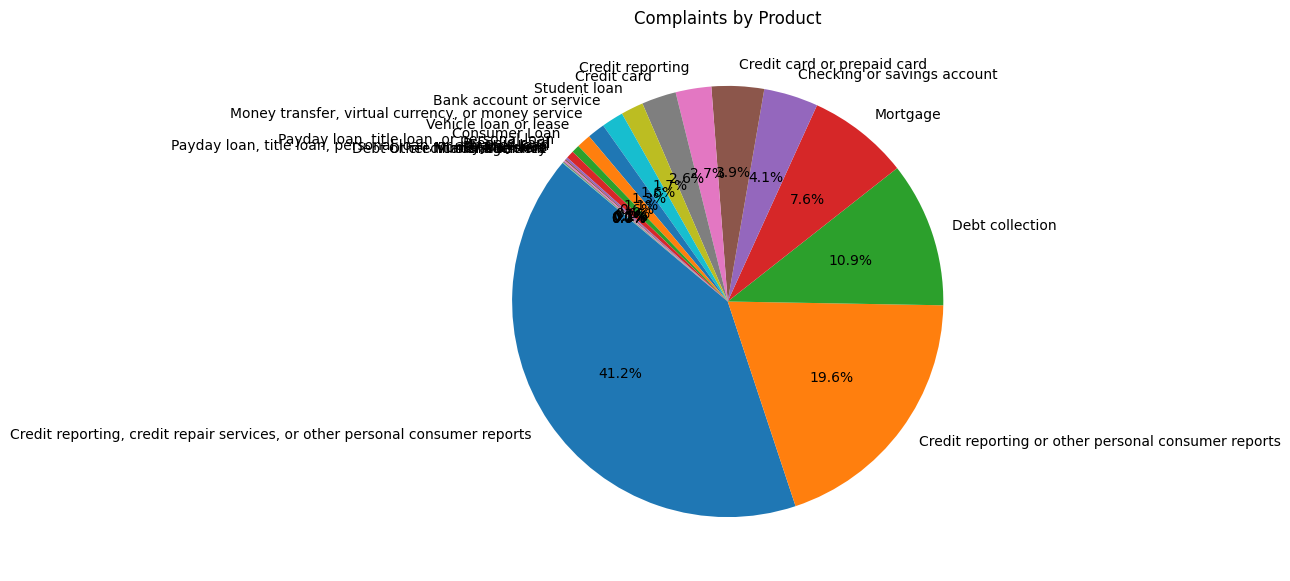

In [22]:
# Plotting with Matplotlib with pie chart
plt.figure(figsize=(10, 7))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Complaints by Product')
plt.show()

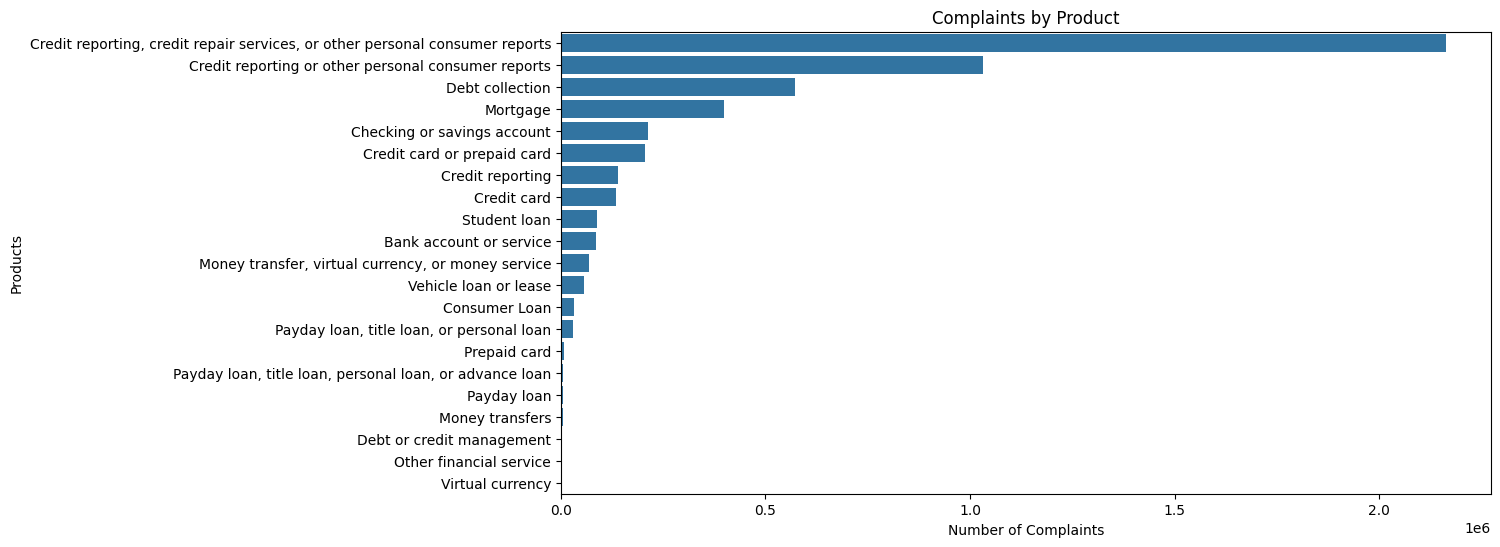

In [37]:
# Plotting the bar chart to find complaints found in Products
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.values,y=product_counts.index)
plt.title('Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Products')
plt.show()

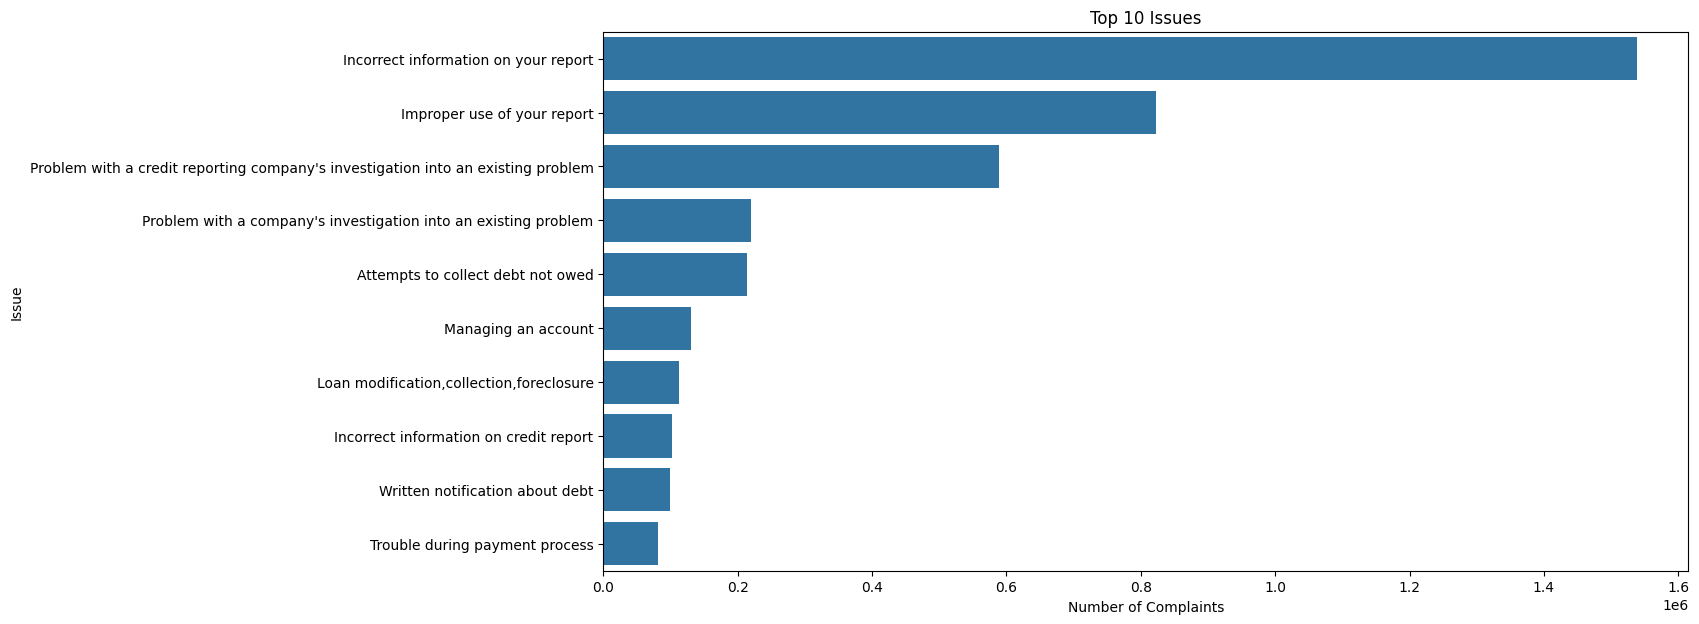

In [29]:
# Count complaints by issue
issue_counts = df['Issue'].value_counts()

# Plotting

# Plotting with Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x=issue_counts.head(10).values, y=issue_counts.head(10).index)
plt.title('Top 10 Issues')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue')
plt.show()


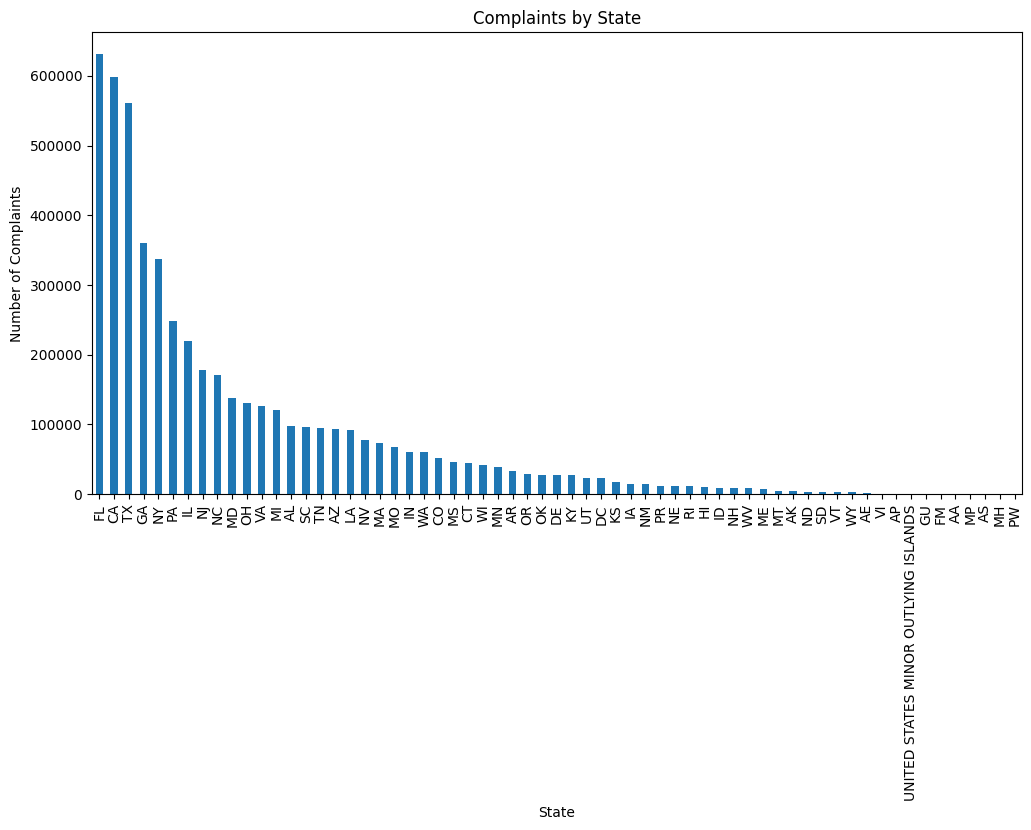

In [41]:
# Count complaints by state
state_counts = df['State'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Complaints by State')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()


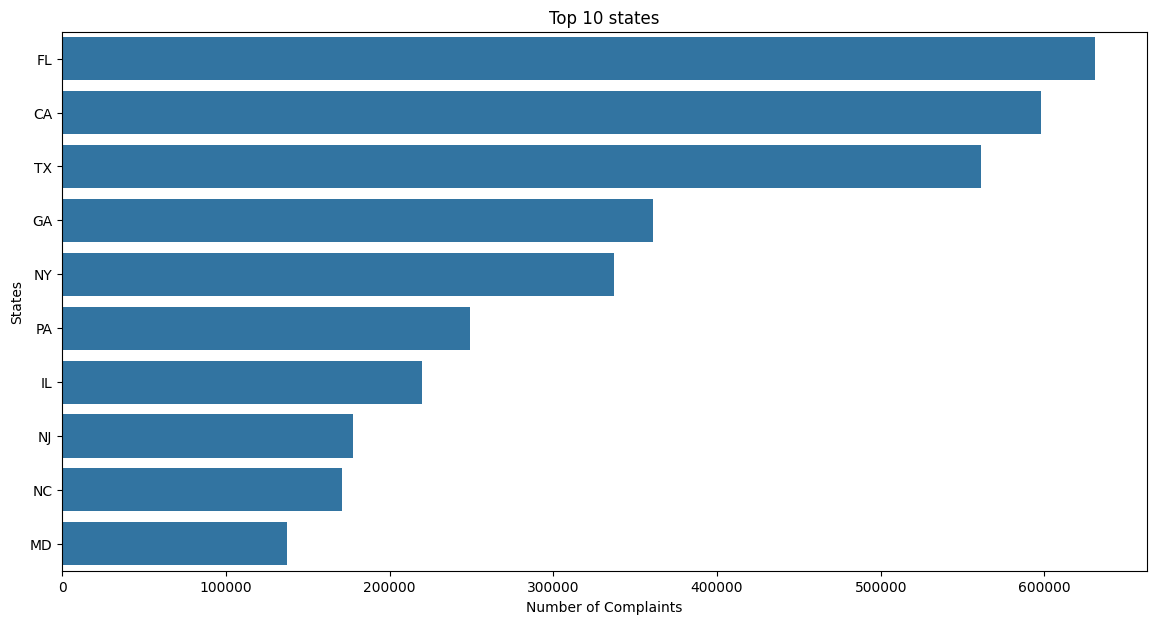

In [52]:
plt.figure(figsize=(14, 7))
sns.barplot(x=state_counts.head(10).values, y=state_counts.head(10).index)
plt.title('Top 10 states')
plt.xlabel('Number of Complaints')
plt.ylabel('States')
plt.show()


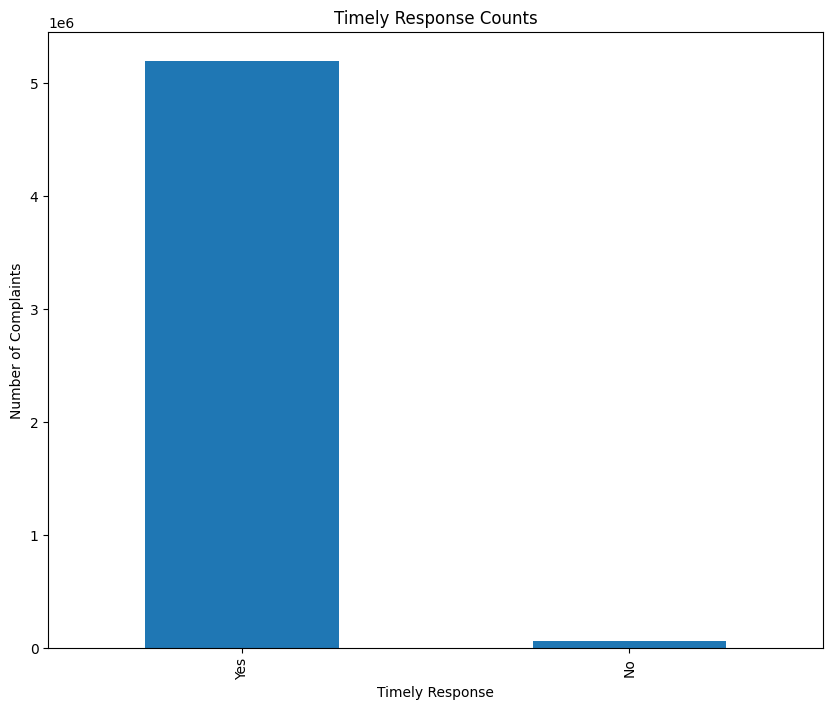

In [58]:
#Timely responce
Timely_response=df['Timely response?'].value_counts()


plt.figure(figsize=(10,8))
Timely_response.plot(kind='bar')
plt.title('Timely Response Counts')
plt.xlabel('Timely Response')
plt.ylabel('Number of Complaints')
plt.show()           

Exploring Complaints by Company

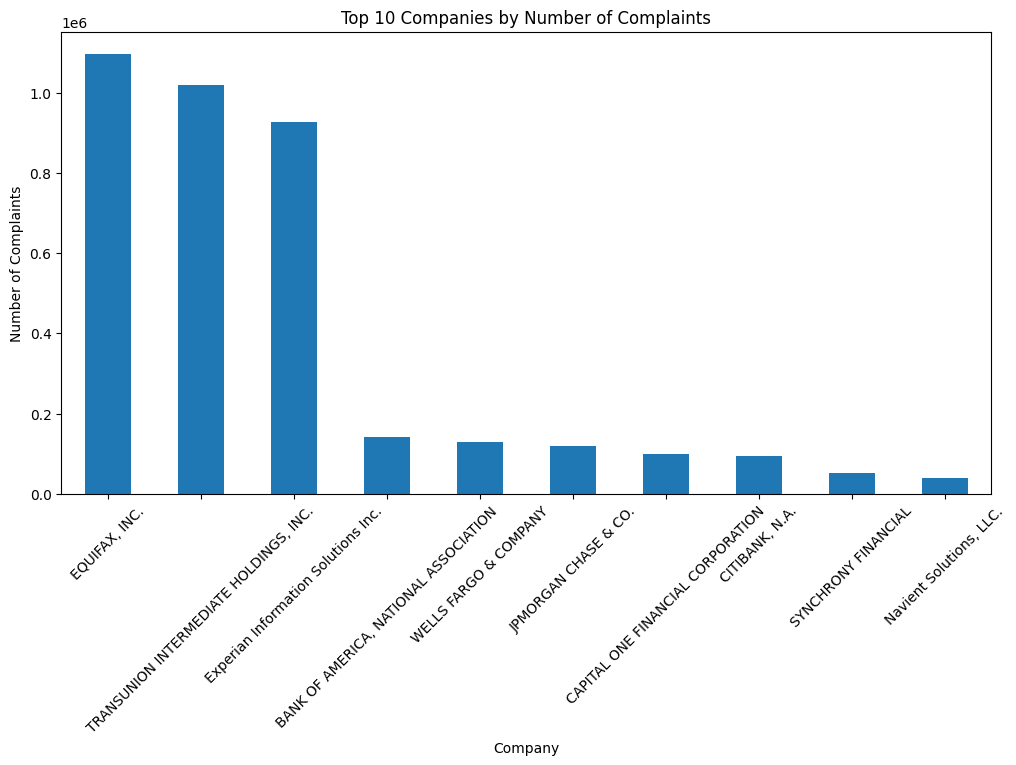

In [60]:
# Count complaints by company
company_counts = df['Company'].value_counts()

# Plot the top 10 companies with the most complaints
plt.figure(figsize=(12, 6))
company_counts.head(10).plot(kind='bar')
plt.title('Top 10 Companies by Number of Complaints')
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


Complaint Outcomes and Company Responses

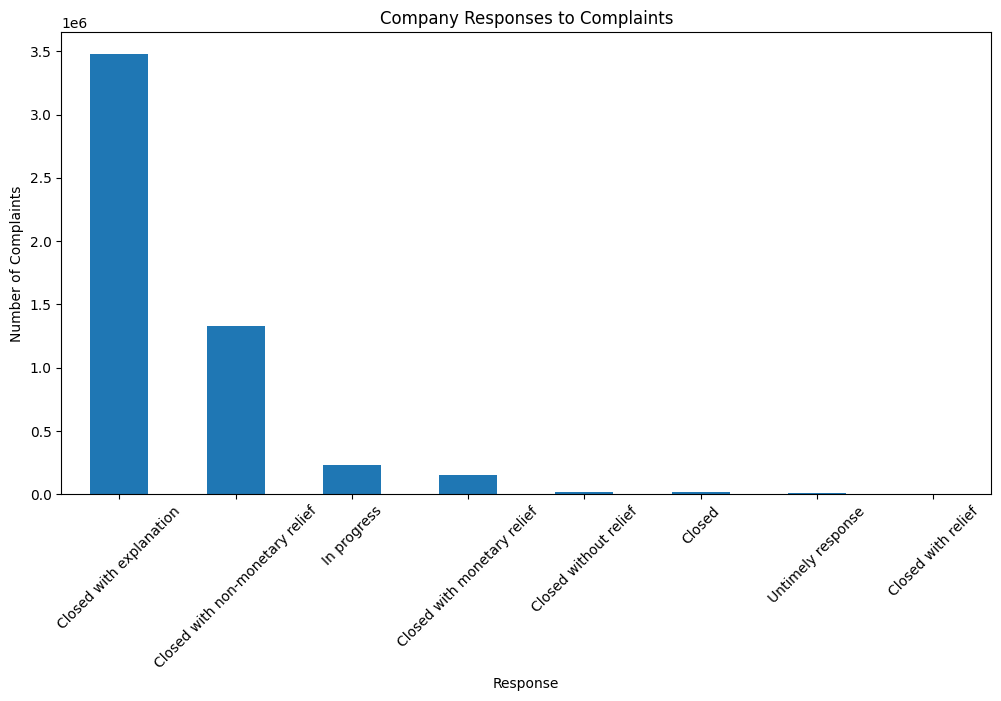

In [61]:
# Count different complaint outcomes
outcome_counts = df['Company response to consumer'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
outcome_counts.plot(kind='bar')
plt.title('Company Responses to Complaints')
plt.xlabel('Response')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


Exploring Issues by Product Type

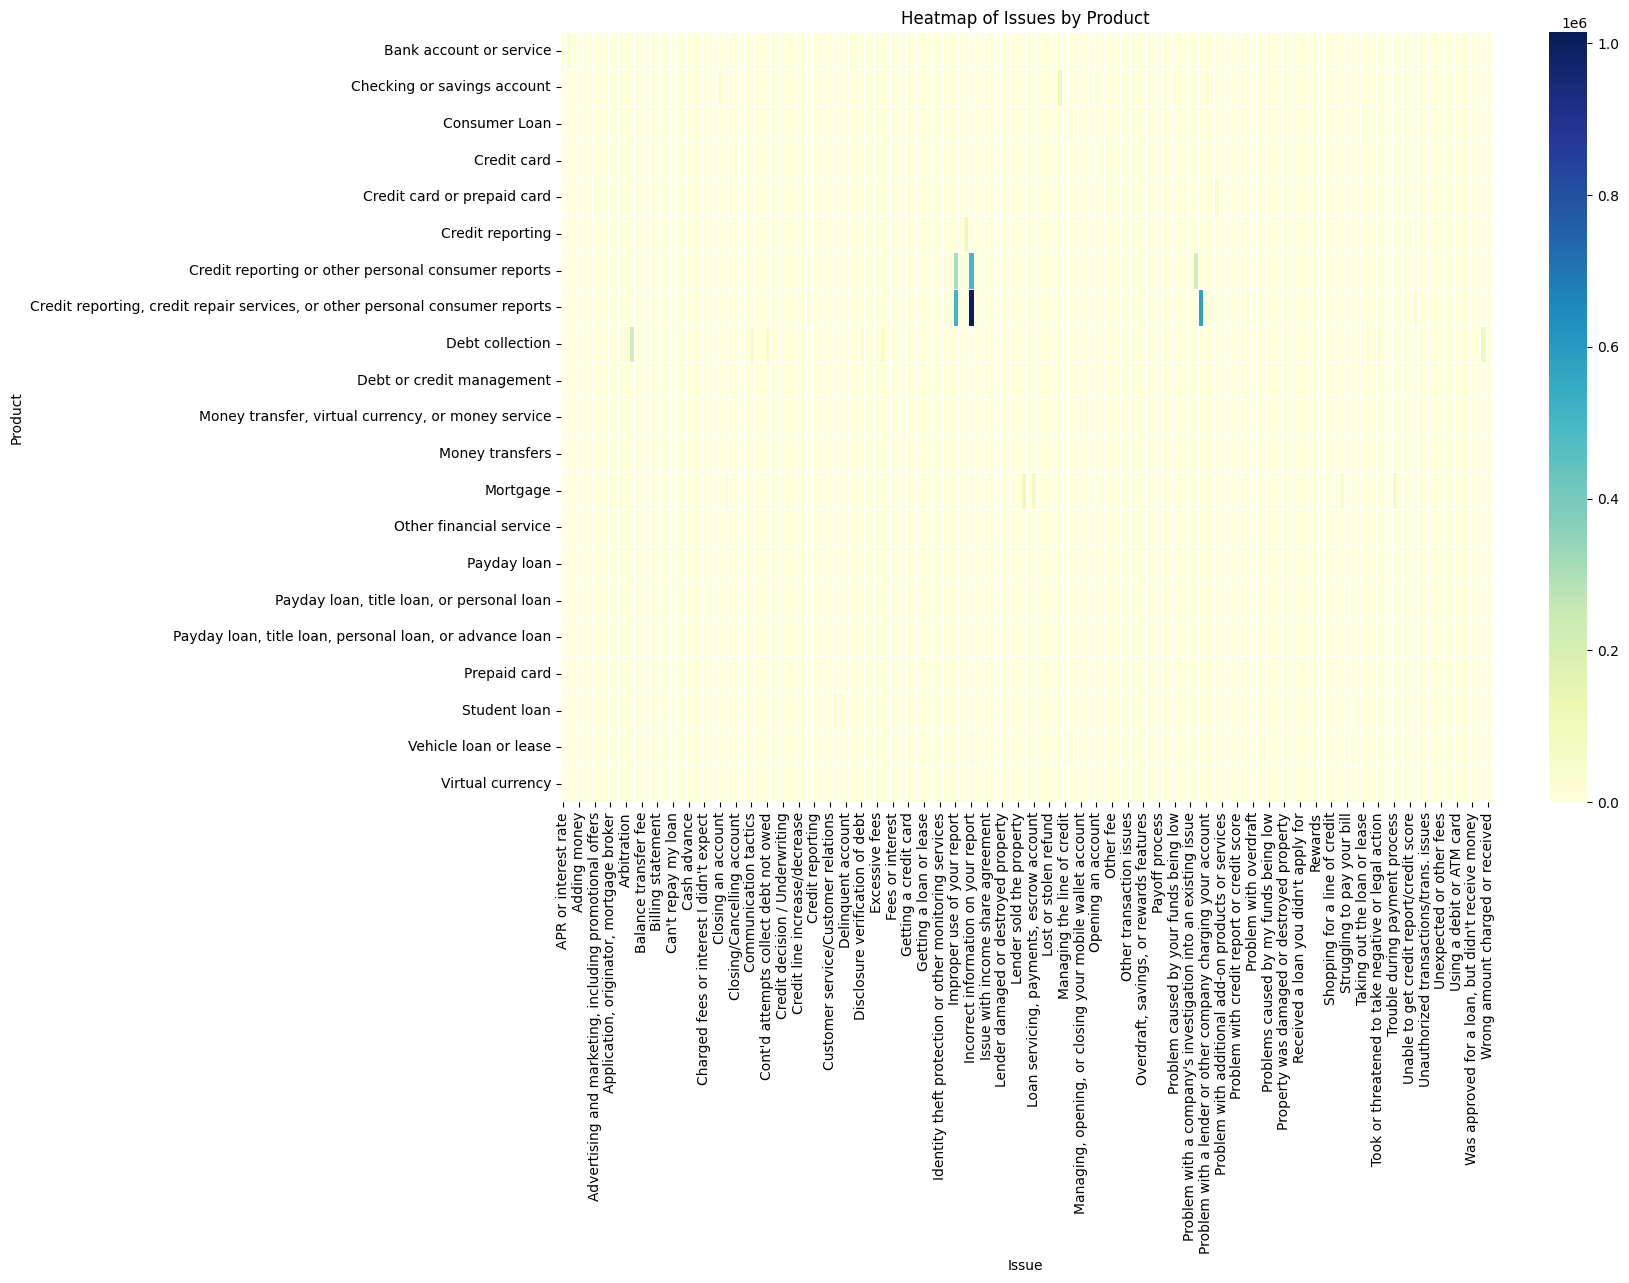

In [63]:
issues_by_product = pd.pivot_table(df, values='Complaint ID', index='Product', columns='Issue', aggfunc='count', fill_value=0)
plt.figure(figsize=(15, 10))
sns.heatmap(issues_by_product, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Issues by Product')
plt.xlabel('Issue')
plt.ylabel('Product')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Time-Series Analysis by Product

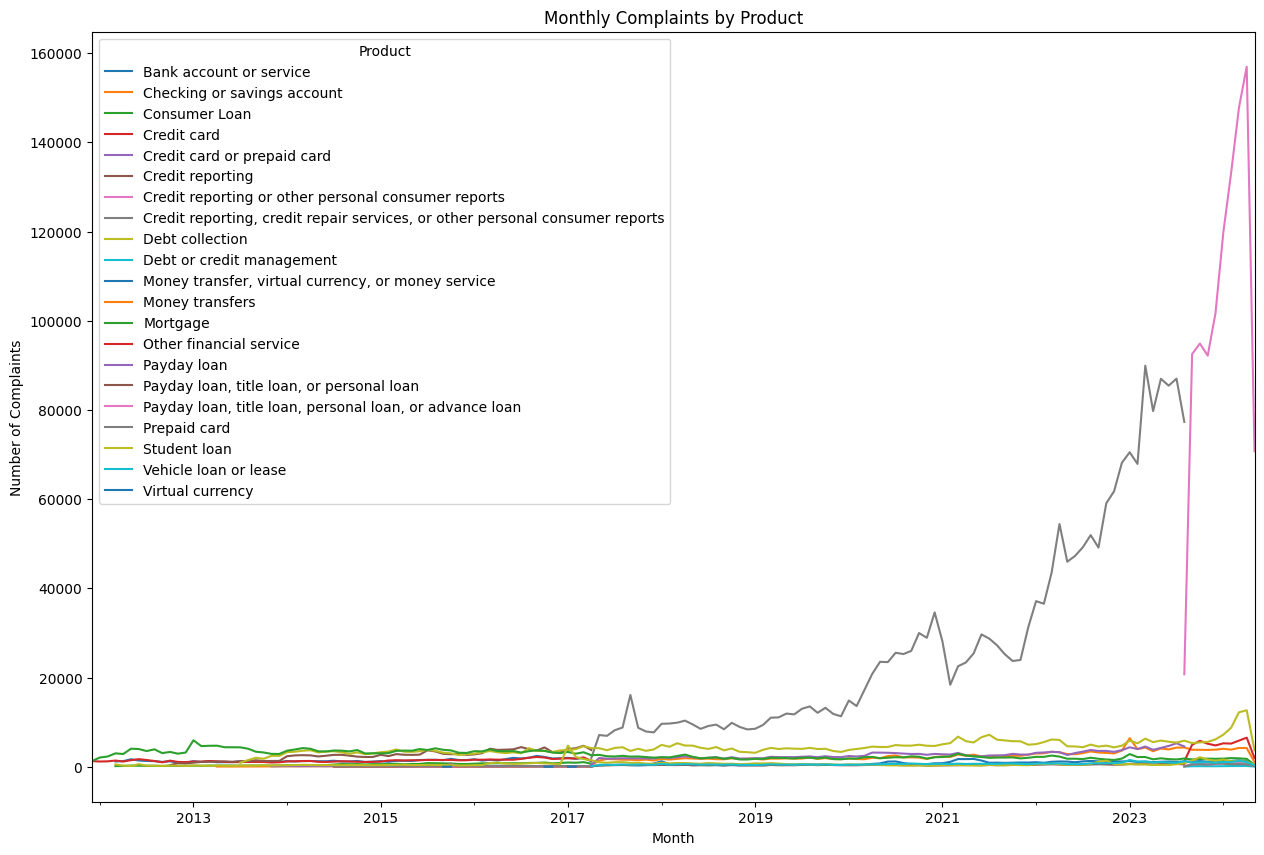

In [64]:
# Group by product and month, then count complaints
complaints_by_product_month = df.groupby([df['Date received'].dt.to_period('M'), 'Product']).size().unstack()

# Plotting time series
complaints_by_product_month.plot(figsize=(15, 10), title='Monthly Complaints by Product')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.show()


In [40]:
def find_length_of_longest(numbers):
    if not numbers:
        return 0
    
    max_length = 1
    current_length = 1
    
    for i in range(1, len(numbers)):
        if numbers[i] > numbers[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1
    
    return max_length
    
input_array = [1, 3, 5, 4, 7]
print("Output:", find_length_of_longest(input_array)) 


Output: 3


In [41]:

def find_length_of_longest(nums):
    if not nums:
        return 0
    
    max_length = 1
    current_length = 1
    
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1
    
    return max_length


input_array = [2, 2, 2, 2, 2]
print("Output:", find_length_of_longest(input_array))  


Output: 1


In [61]:
from functools import cmp_to_key
def compare(a, b):
    if a+b>b+a:
        return -1
    elif b+a<a+b:
        return 1
    else:
        return 0
def larger_number(num):
    num=list(map(str,num))
    num.sort(key=cmp_to_key(compare))
    larger_numbers=''.join(num)
    if larger_numbers[0]=='0':
        return '0'
    else:
        return larger_numbers
input_num=[10,2]
print('output:',larger_number(input_num))


output: 210


In [65]:
from functools import cmp_to_key

def compare(x, y):
    if x + y > y + x:
        return -1
    elif x + y < y + x:
        return 1
    else:
        return 0

def largestNumber(nums):
    # Convert numbers to strings
    nums = list(map(str, nums))
    
    # Sort using the custom comparator
    nums.sort(key=cmp_to_key(compare))
    
    # Join the numbers to form the largest number
    largest_num = ''.join(nums)
    
    # Handle the case where the largest number is 0
    if largest_num[0] == '0':
        return '0'
    else:
        return largest_num

# Example usage
number = [3, 30, 34, 5, 9]
larger_number = largestNumber(number)
print("Output:", larger_number)  # Output: "9534330"


Output: 9534330


In [34]:
df=pd.read_json('DT A1 sample_json (1) (1) (3).json')
print(df)

                                                           web-app
servlet          [{'servlet-name': 'cofaxCDS', 'servlet-class':...
servlet-mapping  {'cofaxCDS': '/', 'cofaxEmail': '/cofaxutil/ae...
taglib           {'taglib-uri': 'cofax.tld', 'taglib-location':...


In [67]:
df['web-app']['servlet']

[{'servlet-name': 'cofaxCDS',
  'servlet-class': 'org.cofax.cds.CDSServlet',
  'init-param': {'configGlossary:installationAt': 'Philadelphia, PA',
   'configGlossary:adminEmail': 'ksm@pobox.com',
   'configGlossary:poweredBy': 'Cofax',
   'configGlossary:poweredByIcon': '/images/cofax.gif',
   'configGlossary:staticPath': '/content/static',
   'templateProcessorClass': 'org.cofax.WysiwygTemplate',
   'templateLoaderClass': 'org.cofax.FilesTemplateLoader',
   'templatePath': 'templates',
   'templateOverridePath': '',
   'defaultListTemplate': 'listTemplate.htm',
   'defaultFileTemplate': 'articleTemplate.htm',
   'useJSP': 'false',
   'jspListTemplate': 'listTemplate.jsp',
   'jspFileTemplate': 'articleTemplate.jsp',
   'cachePackageTagsTrack': 200,
   'cachePackageTagsStore': 200,
   'cachePackageTagsRefresh': 60,
   'cacheTemplatesTrack': 100,
   'cacheTemplatesStore': 50,
   'cacheTemplatesRefresh': 15,
   'cachePagesTrack': 200,
   'cachePagesStore': 100,
   'cachePagesRefresh': 10

In [36]:
df1=pd.DataFrame(df['web-app']['servlet'])
df1

,servlet-name,servlet-class,init-param
0,cofaxCDS,org.cofax.cds.CDSServlet,{'configGlossary:installationAt': 'Philadelphi...
1,cofaxEmail,org.cofax.cds.EmailServlet,"{'mailHost': 'mail1', 'mailHostOverride': 'mai..."
2,cofaxAdmin,org.cofax.cds.AdminServlet,NaN
3,fileServlet,org.cofax.cds.FileServlet,NaN
4,cofaxTools,org.cofax.cms.CofaxToolsServlet,"{'templatePath': 'toolstemplates/', 'log': 1, ..."


In [38]:
new_df=df1[['servlet-name','servlet-class']]
new_df

,servlet-name,servlet-class
0,cofaxCDS,org.cofax.cds.CDSServlet
1,cofaxEmail,org.cofax.cds.EmailServlet
2,cofaxAdmin,org.cofax.cds.AdminServlet
3,fileServlet,org.cofax.cds.FileServlet
4,cofaxTools,org.cofax.cms.CofaxToolsServlet


In [39]:
new_df.to_csv('servlet_data.csv', index=False)